## Data
### Breast Cancer Wisconsin (Diagnostic) Dataset
The data used in the project is UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

## Objective
Our objective here is to predict whether the cancer is malignant(1) or benign(0), depending on the features of cancer, this can be done with a simple classification model, but we would take the help of Neural Networks for higher accuracy.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/DK/OneDrive/Desktop/Data Science/udemy/TensorFlow_FILES/DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
df['Target'] = df['benign_0__mal_1']

In [6]:
df = df.drop('benign_0__mal_1', axis = 1)

<AxesSubplot:xlabel='Target', ylabel='count'>

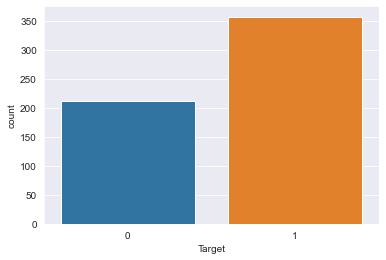

In [7]:
sns.set_style('darkgrid')
sns.countplot(df['Target'])

<AxesSubplot:>

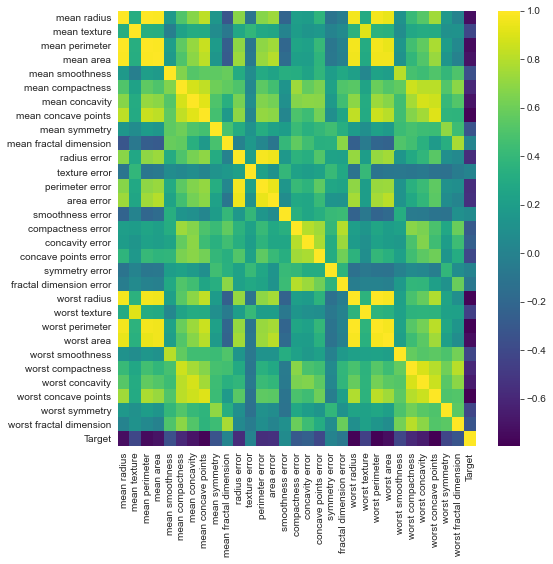

In [8]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), cmap = 'viridis')

In [9]:
df.corr()['Target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

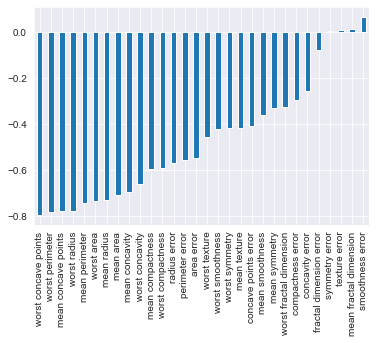

In [10]:
df.corr()['Target'][:-1].sort_values().plot(kind = 'bar')

### Splitting and Scaling

In [11]:
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions_1 = lr.predict(X_test)
print(classification_report(y_test,predictions_1))
print(confusion_matrix(y_test,predictions_1))
accuracy_1 = accuracy_score(y_test, predictions_1) * 100
print('The accuracy of model is: ' + str(accuracy_1) + '%')

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[41  2]
 [ 0 71]]
The accuracy of model is: 98.24561403508771%


### Neural Network

In [13]:
nn = Sequential()

nn.add(Dense(30, activation='relu'))
nn.add(Dropout(0.5))

nn.add(Dense(15, activation='relu'))
nn.add(Dropout(0.5))

nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
nn.fit(x=X_train, y= y_train.values,
          validation_data = (X_test, y_test.values), 
          epochs = 250, batch_size = 128)

Train on 455 samples, validate on 114 samples
Epoch 1/250
455/455 [==============================] - 0s 71us/sample - loss: 0.1198 - acc: 0.9429 - val_loss: 0.0575 - val_acc: 0.9737
Epoch 2/250
455/455 [==============================] - 0s 105us/sample - loss: 0.0907 - acc: 0.9670 - val_loss: 0.0568 - val_acc: 0.9737
Epoch 3/250
455/455 [==============================] - 0s 88us/sample - loss: 0.1141 - acc: 0.9538 - val_loss: 0.0564 - val_acc: 0.9737
Epoch 4/250
455/455 [==============================] - 0s 88us/sample - loss: 0.0933 - acc: 0.9736 - val_loss: 0.0564 - val_acc: 0.9737
Epoch 5/250
455/455 [==============================] - 0s 88us/sample - loss: 0.1115 - acc: 0.9626 - val_loss: 0.0566 - val_acc: 0.9737
Epoch 6/250
455/455 [==============================] - 0s 88us/sample - loss: 0.0957 - acc: 0.9626 - val_loss: 0.0570 - val_acc: 0.9737
Epoch 7/250
455/455 [==============================] - 0s 105us/sample - loss: 0.1107 - acc: 0.9626 - val_loss: 0.0575 - val_acc: 0.9737


<AxesSubplot:>

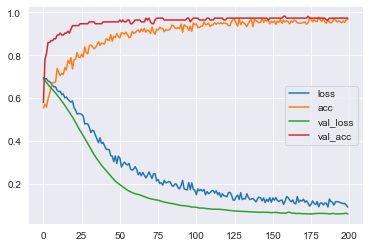

In [15]:
loss = pd.DataFrame(nn.history.history)
loss.plot()

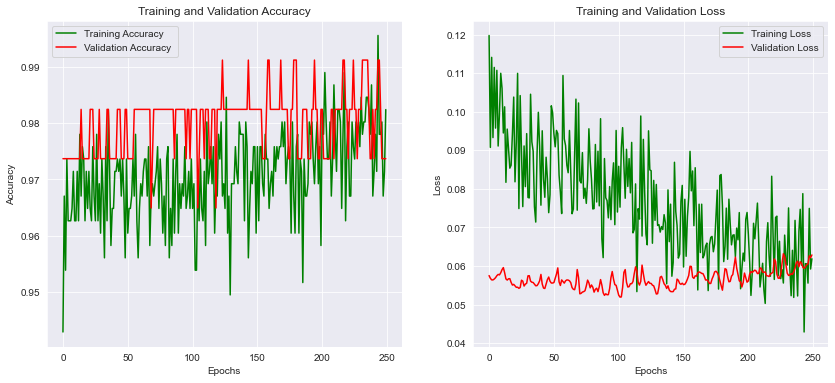

In [18]:
epochs = [i for i in range(250)]
fig, ax = plt.subplots(1,2)

ax[0].plot(epochs, nn.history.history['acc'], 'g-', label = 'Training Accuracy')
ax[0].plot(epochs, nn.history.history['val_acc'], 'r-', label = 'Validation Accuracy ')
ax[0].set_title('Training and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, nn.history.history['loss'], 'g-', label = 'Training Loss')
ax[1].plot(epochs, nn.history.history['val_loss'], 'r-', label = 'Validation Loss')
ax[1].set_title('Training and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

fig.set_size_inches(14,6)

In [19]:
predictions_2 = nn.predict_classes(X_test)
print(classification_report(y_test,predictions_2))
print(confusion_matrix(y_test,predictions_2))
accuracy_2 = accuracy_score(y_test, predictions_2) * 100
print('The accuracy of model is: ' + str(accuracy_2) + '%')

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[42  1]
 [ 2 69]]
The accuracy of model is: 97.36842105263158%


### Random Forest

In [20]:
rfc = RandomForestClassifier(n_estimators = 400)
rfc.fit(X_train, y_train)
predictions_3 = rfc.predict(X_test)
print(classification_report(y_test,predictions_3))
print(confusion_matrix(y_test,predictions_3))
accuracy_3 = accuracy_score(y_test, predictions_3) * 100
print('The accuracy of model is: ' + str(accuracy_3) + '%')

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

[[40  3]
 [ 1 70]]
The accuracy of model is: 96.49122807017544%


In [21]:
Accuracy = pd.DataFrame({'Accuracy':[accuracy_1, accuracy_2, accuracy_3],'Model': ['Logistic Reg', 'Neural Model', 'Random Forest']})
Accuracy

,Accuracy,Model
0,98.245614,Logistic Reg
1,97.368421,Neural Model
2,96.491228,Random Forest
